# CDS: Numerical Methods Assignments

- See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord.

- Solutions must be submitted via the Jupyter Hub.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

## Submission

1. Name all team members in the the cell below
2. make sure everything runs as expected
3. **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
4. **run all cells** (in the menubar, select Cell$\rightarrow$Run All)
5. Check all outputs (Out[\*]) for errors and **resolve them if necessary**
6. submit your solutions  **in time (before the deadline)**

## Parabolic PDEs: 1D Schrödinger Equation with Potential

Here we aim to solve the 1D (parabolic) Schrödinger equation (SEQ) for a particle exposed to some potential $V(x)$

\begin{align*}
    i \hbar \frac{\partial}{\partial t} \Psi(x, t) = \frac{-\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \Psi(x, t) + V(x) \Psi(x, t).
\end{align*}
    
For simplicity we will set $\hbar = 1$ and $m=0.5$ in the following. First you will analyze the stationary solutions of the SEQ for a given potential, using finite differences to approximate all involved derivatives. Then you will need to derive and apply the Crank-Nicolson approach for this PDE to study the dynamics of the SEQ.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Task 1

The stationary SEQ

\begin{align*}
    H \Psi(x) = \frac{-\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \Psi(x) + V(x) \Psi(x) = E \Psi(x)
\end{align*}

can be numerically studied by discretizing the spatial coordinate $x$ as $x_i = ih$ and approximating the second derivative with finite differences. This results in an eigenvalue problem of the form $H \vec{\Psi} = E \vec{\Psi}$, where $\Psi$ is now a vector in the discretized positions $x_i$. By diagonalizing the matrix $H$ we simultaneously get both the eigenenergies $E_i$ and the corresponding eigenfunctions $\vec{\Psi}_i$. 

Derive the matrix representation of the Hamiltonian $H$ and write your final result in the cell below. (Double click on "YOUR ANSWER HERE" to open the cell, and ctrl+enter to compile.) 

Implement a simple Python function $\text{SEQStat(x, V)}$ which takes the discretized grid $x_i$ and the potential $V(x)$ as arguments and which returns all eigenvalues $E$ and eigenfunctions $\vec{\Psi}$.

The potential $V(x)$ is a scalar quantity, and will therefore only occur on the diagonal of the matrix $H$.
The second derivative operator will however be matrix valued, and we will determine it by looking at the finite differences approximation.

$$
\frac{\partial^2\Psi}{\partial{}x^2}(x_i) = \frac{\Psi(x_{i+1}) - 2\Psi(x_i) + \Psi(x_{i-1})}{h^2} - \frac{h^2}{12} \frac{\partial^4\Psi}{\partial x^4}(x_i)
$$

For small $h$, we can ignore the latter term, which we will indeed do.
We can encode this in a tridiagonal matrix, as each step depends on the step before and after it and not on anything else.

Our beautiful hamiltonian now has elements like

$$
H_{ij} = \frac{-\hbar^2}{2m} \left[ \delta_{i,j-1} - 2\delta_{ij} + \delta_{i,j+1} \right] + V(x) \delta_{ij} = -\left[ \delta_{i,j-1} - 2\delta_{ij} + \delta_{i,j+1} \right] + V(x) \delta_{ij}
$$

with $\delta_{ij} = 1 \iff i = j$, and using the approximations $\hbar = 1$, $m = 0.5$.

$$
%finite differences for second derivative to get a tridiagonal matrix (one lower and one higher than diagonal)
%then plot eigenvalues
%no time component -> not complex?
%energy should be real
%eigenvectors squared should be normalized
$$

In [2]:
def SEQStat(x, V):
    """
    Numerically solves the stationary Schrödinger equation over
    the grid of x values, in a potential given by V, using
    the approximations ℏ = 1, 𝑚 = 0.5.
    
    Args:
        x: array of evenly spaced space values x
        V: function that takes in a location x and returns a scalar potential value

    Returns:
        A tuple of the eigenvalues E and eigenfunctions \Psi of the hamiltonian H.
    """
    
    n = len(x)
    h = x[1] - x[0]
    
    # In the stationary case, 
    H = 1/h**2*(np.eye(n, n, -1) - 2*np.eye(n) + np.eye(n, n, 1)) + np.eye(n)*V(x) 
    
    # In principle, the eigenvalues and eigenvectors could be complex, so
    # we opt for eigh instead of eig.
    return np.linalg.eigh(H)

### Task 2

Use your function to calculate and plot the first few eigenfunctions for $V(x) =  0.25  x^2$. Add the potential to your plot. Use $-5 \leq x \leq +5$ discretized in $100$ steps.

Eigenstate n = 0 yields total probability mass = 0.9999999999999999
Eigenstate n = 1 yields total probability mass = 1.0
Eigenstate n = 2 yields total probability mass = 1.0
Eigenstate n = 3 yields total probability mass = 1.0


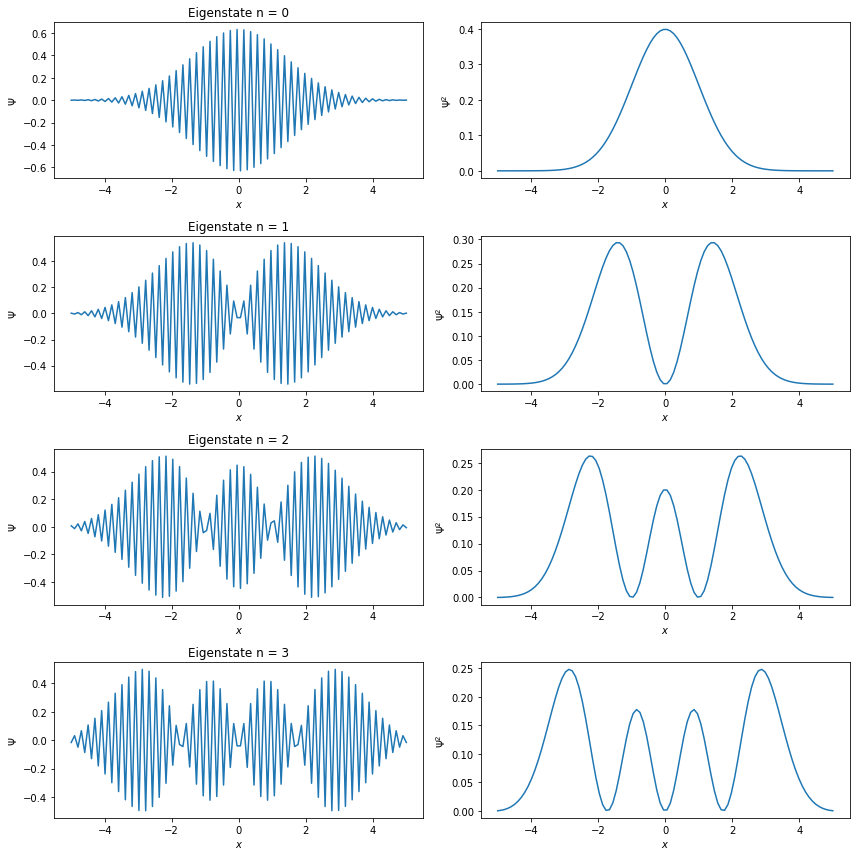

In [3]:
V = lambda x: 0.25*x**2
x = np.linspace(-5, 5, 100)
the_first_few = 4

E, Psi = SEQStat(x, V)

fig = plt.figure(figsize=(12,12))

for n in range(the_first_few):
    # Normalize the found eigenfunctions using Riemann midpoint sums
    prob_mass = np.sum((x[1:] - x[:-1])*(Psi[1:, n]**2 + Psi[:-1, n]**2)/2)
    Psi[:, n] /= np.sqrt(prob_mass)
    
    # Confirm normalization
    prob_mass = np.sum((x[1:] - x[:-1])*Psi[:-1, n]**2)
    print("Eigenstate n =", n, "yields total probability mass =", prob_mass)
    
    # Plot the eigenfunctions
    ax = fig.add_subplot(the_first_few, 2, 2*n + 1)
    ax.set_title("Eigenstate n = " + str(n))
    ax.plot(x, Psi[:, n], label="Eigenstate n = " + str(n))
    ax.set_xlabel("$x$")
    ax.set_ylabel("$\Psi$")
    
    # Plot the squared eigenfunctions to give an idea about probability
    ax = fig.add_subplot(the_first_few, 2, 2*n + 2)
    ax.plot(x, Psi[:, n]**2, label="Eigenstate n = " + str(n))
    ax.set_xlabel("$x$")
    ax.set_ylabel("$\Psi^2$")

plt.tight_layout()
plt.show()

### Task 3

Now we turn to the full dynamical problem, which can be numerically analyzed using the Crank-Nicolson approach, which averages over forward and backward scattering finite differences for the time derivative. Your task is to derive the corresponding formulas for the 1D SEQ from above, implement it, and apply it to study the time-dynamics for the 1D SEQ. Applying the Crank-Nicolson approach to the 1D SEQ from above results in an equation system of the form

\begin{align*}
    \mathbf{A} \vec{w}_{j+1} = \mathbf{B} \vec{w}_{j}
\end{align*}

where $\vec{w}_j$ is the space- and time-discretized approximation to $\Psi(x_i, t_j)$ with $j$ being the time-discretization index. $\mathbf{A}$ and $\mathbf{B}$ are $(m-2)\times(m-2)$ matrices of the form

\begin{align*}
\mathbf{A} =
    \left( \begin{array}{cccc}
    1 + \lambda_1 + \lambda_2 V_1& -\frac{\lambda_1}{2} & & 0\\
    -\frac{\lambda_1}{2} & \ddots & \ddots &  \\
    & \ddots & \ddots &  -\frac{\lambda_1}{2} \\
    0 &  & -\frac{\lambda_1}{2} & 1 + \lambda_1 + \lambda_2 V_{m-1} 
    \end{array}  \right)
\end{align*}

and

\begin{align*}
\mathbf{B} =
    \left( \begin{array}{cccc}
    1 - \lambda_1 - \lambda_2 V_1& +\frac{\lambda_1}{2} & & 0\\
    +\frac{\lambda_1}{2} & \ddots & \ddots &  \\
    & \ddots & \ddots &  +\frac{\lambda_1}{2} \\
    0 &  & +\frac{\lambda_1}{2} & 1 - \lambda_1 - \lambda_2 V_{m-1} 
    \end{array}  \right).
\end{align*}

Derive this form and thereby the definitions of $\lambda_1$ and $\lambda_2$. Start with recapping the derivation of the Crank-Nicolson approach (see Wikipedia or *Numerical Analysis* book by Burden and Faires).

Write your definitions of $\lambda_1$ and $\lambda_2$ in the Markdown cell below. (Double click on "YOUR ANSWER HERE" to open the cell, and ctrl+enter to compile.) 

To do the derivation of the Crank-Nicolson approach following $\textit{Numerical Analysis}$ by Burden and Faires, we start from averaging our 'Forward-Difference method' at the jth step in t:

$$
\frac{w_{i,j+1}-w_{i,j}}{k}-\alpha^2\frac{w_{i+1,j}-2w_{i,j}+w_{i-1,j}}{h^2} = 0.
$$

The local truncation error is:

$$
\tau_F = \frac{k}{2}\frac{\partial^2 u}{\partial t^2}(x_i,\mu_j)+O(h^2).
$$

We do the same for the 'Backward-Difference method' to get:

$$
\frac{w_{i,j+1}-w_{i,j}}{k}-\alpha^2\frac{w_{i+1,j+1}-2w_{i,j+1}+w_{i-1,j+1}}{h^2} = 0,
$$

again with a local truncation error:

$$
\tau_B = -\frac{k}{2}\frac{\partial^2 u}{\partial t^2}(x_i,\hat{u} _j)+O(h^2).
$$

If we make the following assumption:

$$
\frac{\partial^2 u}{\partial t^2}(x_i,\hat{\mu}_j) \approx \frac{\partial^2 u}{\partial t^2}(x_i,\mu_j),
$$

Then we can get the 'averaged-difference method' to write:

$$
\frac{w_{i,j+1}-w_{i,j}}{k}-\frac{\alpha^2}{2}\left[\frac{w_{i+1,j}-2w_{i,j}+w_{i-1,j}}{h^2}+\frac{w_{i+1,j+1}-2w_{i,j+1}+w_{i-1,j+1}}{h^2}\right] = 0,
$$

which now has an truncation error of the order $O(k^2+h^2)$. This is known as the Crank-Nicolson method and is represented in the form described above.

For $\lambda_1$ and $\lambda_2$ we have the following expressions:

$$
\lambda_1 = \alpha^2\frac{k}{h^2}\\
\lambda_2 = 1.
$$

### Task 4

The equation system from above can be used to calculate the time propagation by multiplying the whole expression from the left by $\mathbf{A}^{-1}$. The only needed ingredients are the boundary conditions $w_{i=0,j} = w_{i=m-1,j} = 0$ for all $j$ (not explicitly needed, just used for the derivation of $\mathbf{A}$ and $\mathbf{B}$) and the initial value $w_{i,j=0} = f(x_i)$. 

Implement the Crank-Nicolson approach for our 1D SEQ in a Python function $\text{SEQDyn(x, t, V, f)}$, where $\text{x}$ and $\text{t}$ are the discretized spatial and time grids, $\text{V}$ is the potential, and $\text{f}$ is the function defining the boundary conditions. The function should return a two-dimensional array, which stores the eigenfunction $\Psi(x_i, t_j)$ at all discretized spatial and time coordinates.

Apply it to the SEQ from task 2.2, with $V(x) =  0.25  x^2$ and $f(x) = \operatorname{exp}(-x^2) / 2.5$. Use $-5 \leq x \leq +5$ with $100$ steps and $0 \leq t \leq 50$ with $1000$ steps. Animate your solution (see exercise 9).

In [4]:
def SEQDyn(x, t, V, f):
    """
    Numerically solves the time-dependent Schrödinger equation over
    the gives input parameters, in a potential given by V, using
    the approximations ℏ = 1, 𝑚 = 0.5, using the Crank-Nicolson approach
    
    Args:
        x: array of evenly spaced space values x
        t: array of evenly spaced time values t
        V: function that takes a location x and returns a scalar potential value
        f: function that takes a location x and returns initial values to w for
           the Crank-Nicolson approach

    Returns:
        A tuple of eigenfunctions \Psi of the time-dependent SE.
    """
    
    n = len(x)
    h = x[1] - x[0]
    m = len(t)
    k = t[1] - t[0]
    
    # Setup the Crank-Nicholson parameters
    α  =
    λ1 = α**2*k/h**2
    λ2 = 1
    
    A  = -λ1/2*( np.eye(m - 2, m - 2, -1) + np.eye(m - 2, m - 2, 1) ) - (1 + λ1 + λ2*V)*np.eye(m - 2)
    B  = +λ1/2*( np.eye(m - 2, m - 2, -1) + np.eye(m - 2, m - 2, 1) ) - (1 + λ1 + λ2*V)*np.eye(m - 2)

    # TODO: Finish SEQDyn: implement algorithm, return the right things.


V = lambda x: 0.25*x**2
f = lambda x: np.exp(-x**2)/2.5
x = np.linspace(-5, 5, 100)
t = np.linspace(0, 50, 1000)

SyntaxError: invalid syntax (1568846030.py, line 24)

In [ ]:
# Animate your solution here ...

# YOUR CODE HERE

### [Optional] Task 5

What happens when your initial condition is set to one of the eigenfunctions you obtained from the static 1D SEQ?

In [ ]:
# YOUR CODE HERE

### [Optional] Task 6

Change the potential to a staggered one of the form 

\begin{align*}
    V(x) = \left\{ 
                \begin{array}{cc} 
                    +15 & -4.0 < x < -3.5, \, -2.5 < x < -2.0, \, -1.0 < x < -0.5,  \\ 
                    +15 & +0.5 < x < +1.0, \, +2.0 < x < +2.5, \, +3.5 < x < +4.0,  \\ 
                    0 & \text{else}
                \end{array} \right.
\end{align*}

In [ ]:
def V(x):
    if -4.0 < x < -3.5 or -2.5 < x < -2.0 or -1.0 < x < -0.5:
        return 15.
    if  0.5 < x <  1.0 or  2.0 < x <  2.5 or  3.5 < x <  4.0:
        return 15.
    return 0